In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loader



> Data downloaded from [Here](https://www.kaggle.com/df_sets/zaraavagyan/weathercsv)





## Data cleaning

### Understading about our dataset

In [237]:
df = pd.read_csv("/content/weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


Check the types of df_

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

How big?

In [239]:
df.shape

(366, 22)

In [240]:
df_ = df.copy()

How many missing values?

In [241]:
"""
- The True values has a NULL cells
"""

df_.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [242]:
df_.isnull().sum()*100

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine          300
WindGustDir       300
WindGustSpeed     200
WindDir9am       3100
WindDir3pm        100
WindSpeed9am      700
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [243]:
df_["Sunshine"].isnull().value_counts()

False    363
True       3
Name: Sunshine, dtype: int64

In [244]:
df_["MinTemp"].isnull().value_counts()

False    366
Name: MinTemp, dtype: int64

In [245]:
df_["WindGustDir"].isnull().value_counts()

False    363
True       3
Name: WindGustDir, dtype: int64

In [246]:
df_["WindDir9am"].isnull().value_counts()

False    335
True      31
Name: WindDir9am, dtype: int64

How Does df_ Look_like Statistically?

In [247]:
df_.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


### Revome the NULL values in table


> Replace the NULL cells with Mean, Median for Mode.


In [248]:
"""
- Caculate mean, median and mode
"""
mean_ = df_["Sunshine"].mean()
median_ = df_["Sunshine"].median()
mode_ = df_["WindDir9am"].mode()

print(mean_, median_, mode_)

7.909366391184574 8.6 0    SE
Name: WindDir9am, dtype: object


Cause the types of WindDir9am col is str so we must to use mode instead of mean or median

In [249]:
df_.head(4)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes


In [250]:
"""
Parameters:
- Sunshine(float)
- WindGustDir(str)
- WindDir9am(str)
- WindGustSpeed(float)
- WindSpeed9am(float)
"""

df_["Sunshine"].fillna(mean_, inplace =True)
df_["WindGustSpeed"].fillna(df_["WindGustSpeed"].mean(), inplace =True)
df_["WindGustDir"].fillna(df_["WindGustDir"].mode()[0], inplace =True)
df_["WindDir9am"].fillna(df_["WindDir9am"].mode()[0], inplace =True)
df_["WindSpeed9am"].fillna(df_["WindSpeed9am"].mean(), inplace=True)
df_["WindDir3pm"].fillna(df_["WindDir3pm"].mode()[0], inplace = True)

In [251]:
df_["WindDir9am"].isnull().value_counts()

False    366
Name: WindDir9am, dtype: int64

In [252]:
df_["WindDir3pm"].isnull().value_counts()

False    366
Name: WindDir3pm, dtype: int64

In [253]:
df_.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

### Visualizing

define here some functions for better visualization of the posterior plots.

In [254]:
def resizeplot():
    plt.figure(figsize=(12,6))

def resizecorr():
    plt.figure(figsize=(12,6))

Using correlation matrix

<ipython-input-255-11017f0607f5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

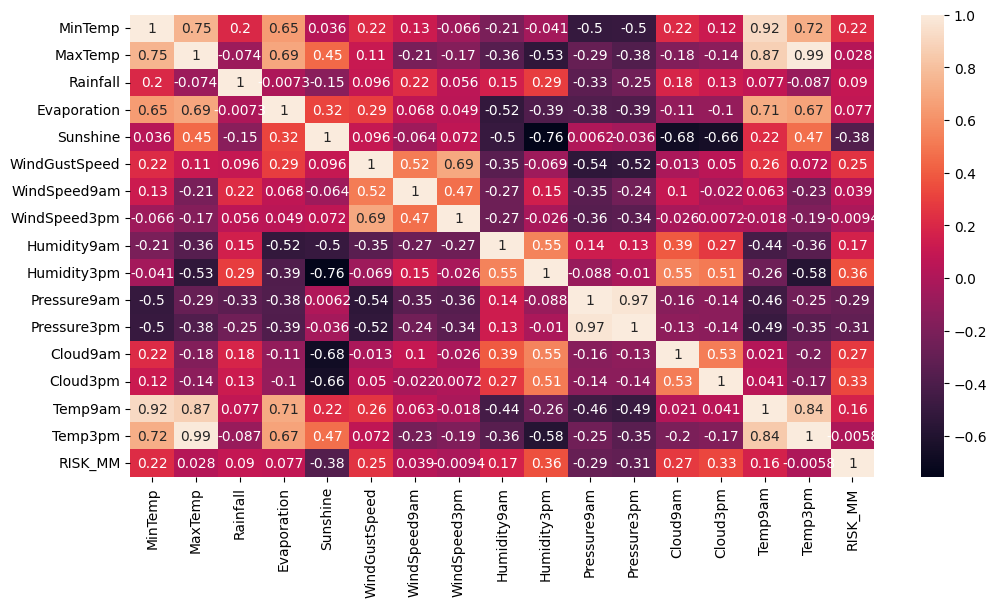

In [255]:
resizecorr()
sns.heatmap(df_.corr(),annot=True)

<ipython-input-256-f5bfd8764687>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



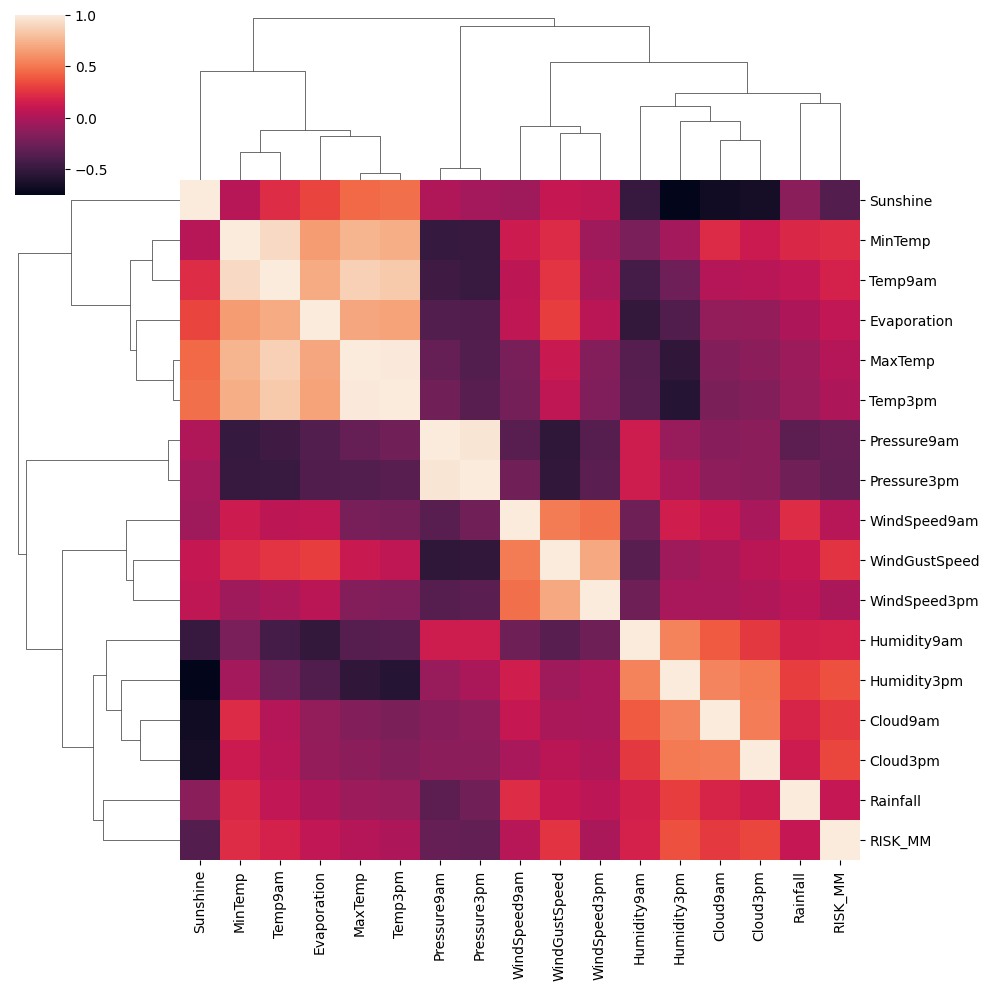

In [256]:
sns.clustermap(df_.corr())

In [257]:
import plotly.express as px

In [258]:
fig = px.imshow(df_.corr(), text_auto=True, aspect="auto")
fig.show()

<ipython-input-258-b85f9005d666>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



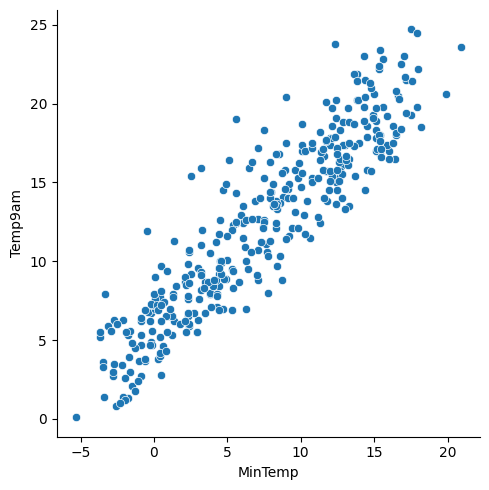

In [259]:
sns.relplot(x="MinTemp", y="Temp9am", data=df_)


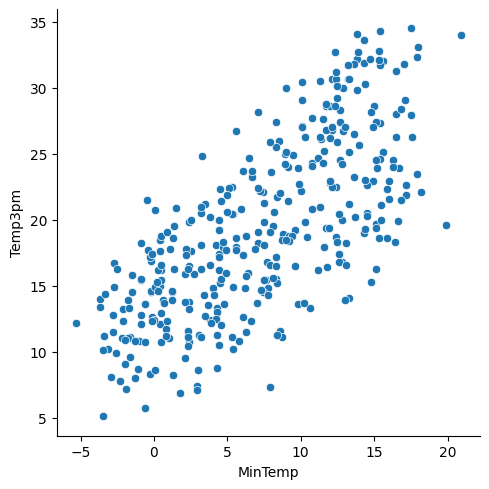

In [260]:
sns.relplot(x="MinTemp", y="Temp3pm", data=df_)


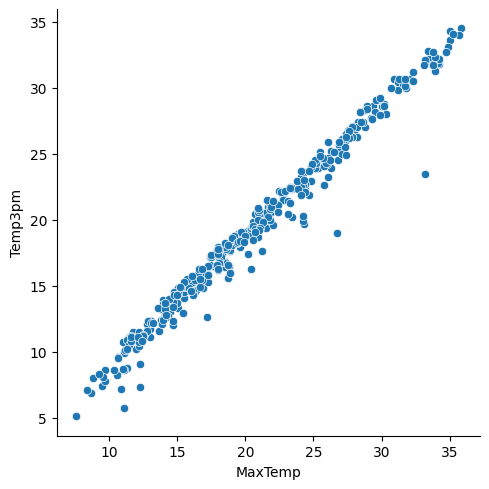

In [261]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=df_)

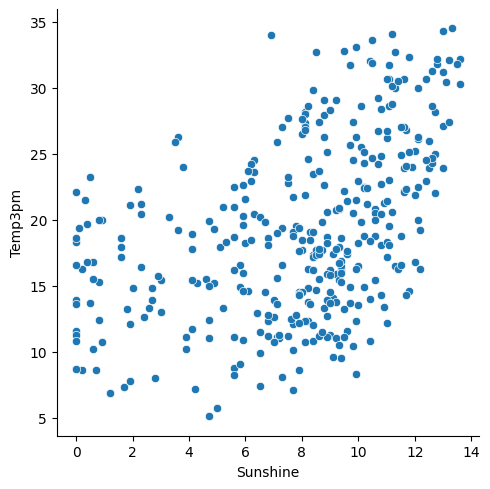

In [262]:
sns.relplot(x='Sunshine',y='Temp3pm',data=df_)

<ipython-input-263-91c45642b7b6>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-263-91c45642b7b6>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Pressure3pm', ylabel='Density'>

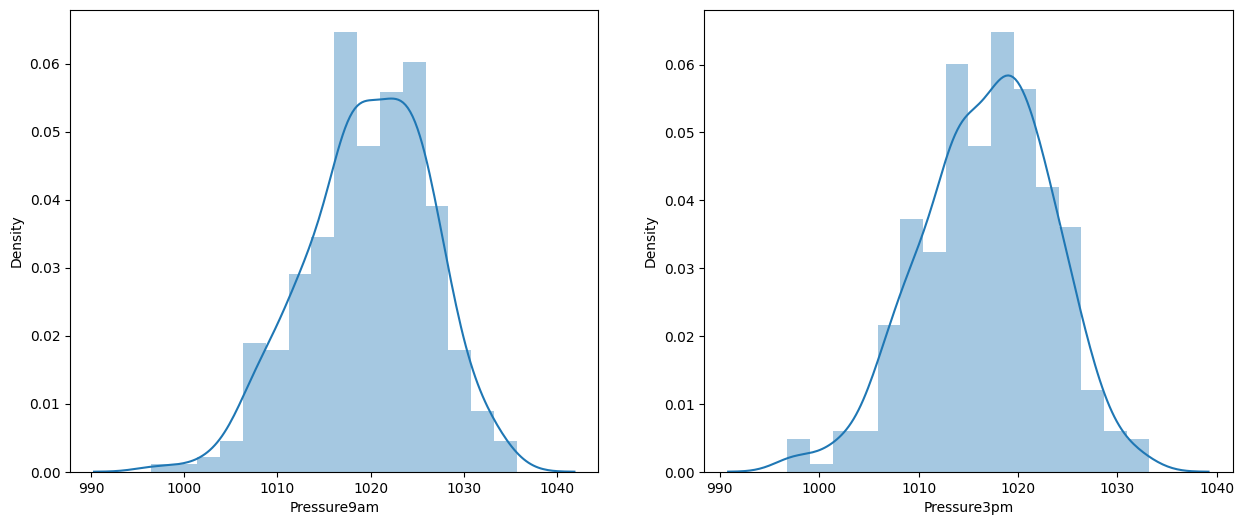

In [263]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.distplot(df_['Pressure9am'],ax=ax[0])
sns.distplot(df_['Pressure3pm'],ax=ax[1])

<ipython-input-264-72168cf6acaa>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-264-72168cf6acaa>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Cloud3pm', ylabel='Density'>

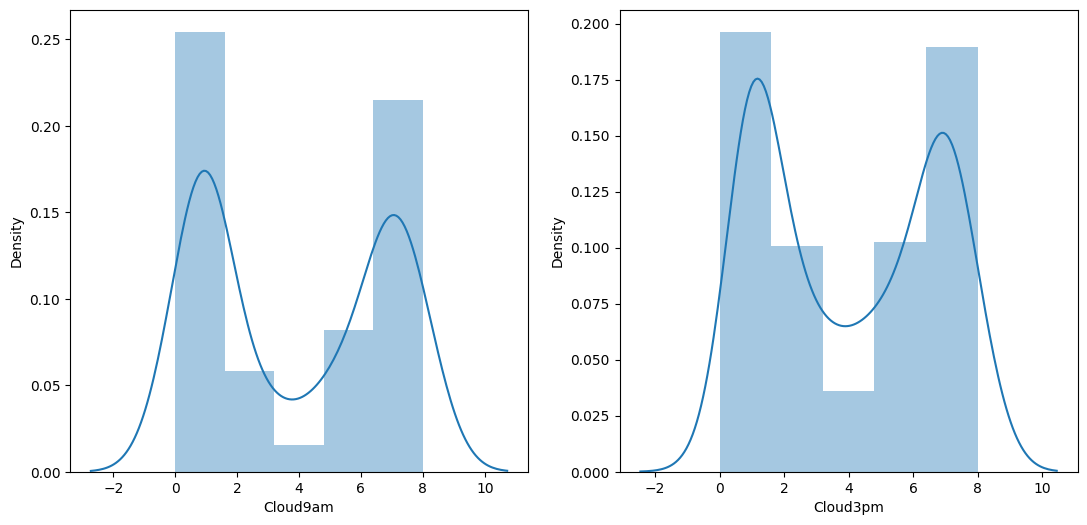

In [264]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.distplot(df_['Cloud9am'],ax=ax[0])
sns.distplot(df_['Cloud3pm'],ax=ax[1])

<ipython-input-265-c668ac900958>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-265-c668ac900958>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




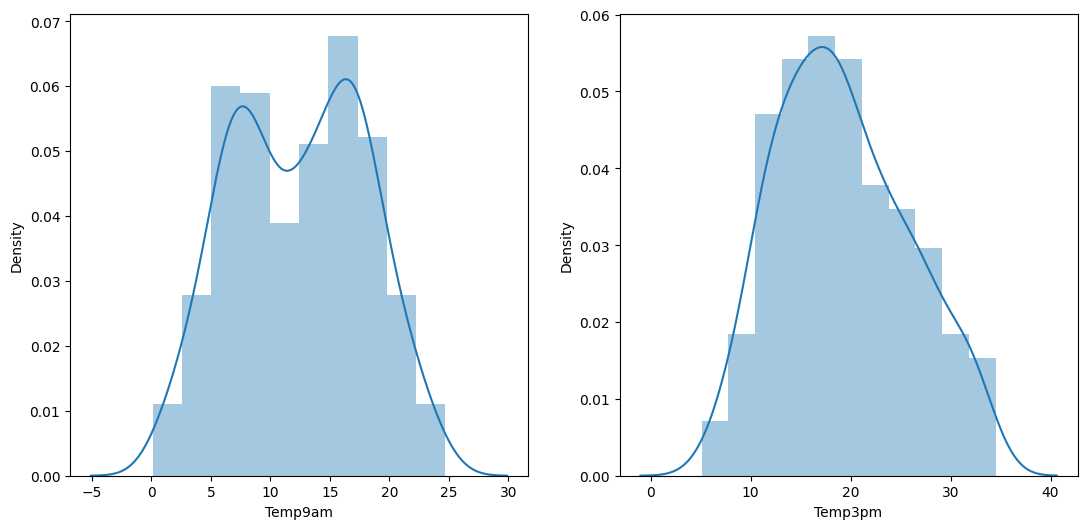

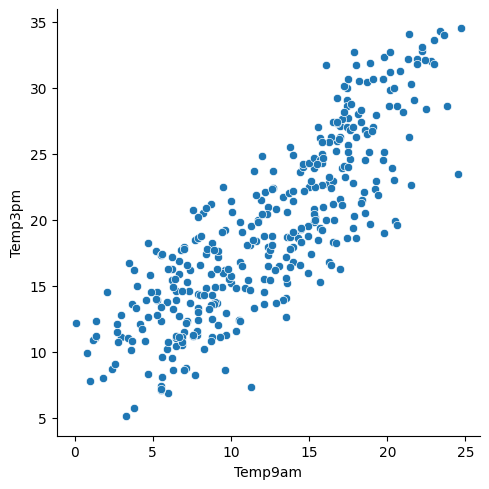

In [265]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.distplot(df_['Temp9am'],ax=ax[0])
sns.distplot(df_['Temp3pm'],ax=ax[1])

sns.relplot(x="Temp9am", y="Temp3pm", data=df_)

# Model

## Data Preprocessing

In [266]:
categorical_feature = [feature for feature in df_.columns if df_[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

5


['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [267]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer

In [268]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    object 
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     366 non-null    object 
 8   WindDir3pm     366 non-null    object 
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [269]:
le = LabelEncoder()
LE = LabelBinarizer()

df_['WindGustDir'] = le.fit_transform(df_['WindGustDir'])
df_['WindDir9am'] = le.fit_transform(df_['WindDir9am'])
# df_['Cloud9am'] = le.fit_transform(df_['Cloud9am'])
# df_['Cloud3pm'] = le.fit_transform(df_['Cloud3pm'])
# df_['Temp9am'] = le.fit_transform(df_['Temp9am'])
# df_['Temp3pm'] = le.fit_transform(df_['Temp3pm'])
# df_['Humidity9am'] = le.fit_transform(df_['Humidity9am'])
# df_['Humidity3pm'] = le.fit_transform(df_['Humidity3pm'])
df_['RainToday'] = le.fit_transform(df_['RainToday'])
df_['RainTomorrow'] = le.fit_transform(df_['RainTomorrow'])
df_['WindDir3pm'] = le.fit_transform(df_['WindDir3pm'])

In [270]:
df_.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [271]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    int64  
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     366 non-null    int64  
 8   WindDir3pm     366 non-null    int64  
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

### Feature Engineering

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X = df_.drop("RainTomorrow", axis=1).values
Y = df_["RainTomorrow"].values

In [274]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [292]:
X_test

array([[ 9.4, 19.2,  0. , ..., 18.8,  0. ,  0. ],
       [13.3, 26.5,  6.6, ..., 25.1,  1. ,  0. ],
       [12.4, 32.1,  0. , ..., 30.7,  0. ,  0. ],
       ...,
       [-0.6, 11.1,  0. , ...,  5.7,  0. ,  1.2],
       [12.6, 18.2, 11. , ..., 16.8,  1. ,  0.2],
       [-2.9,  9.6,  0. , ...,  8.1,  0. ,  0.4]])

### Model prediction

#### Decision Tree

In [275]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
dtree = DecisionTreeClassifier()

In [277]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [278]:
previsor_dtree = dtree.predict(X_test)

In [279]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [280]:
print(classification_report(y_test,previsor_dtree))
print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        21

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

[[100   0]
 [  0  21]]


Acurácia: 100.0 %


#### Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [282]:
Rdf = RandomForestClassifier()

In [287]:
Rdf.fit(X_train,y_train)

RandomForestClassifier()

In [288]:
predictor_forest = Rdf.predict(X_test)

In [289]:
print(classification_report(y_test,predictor_forest))
print(confusion_matrix(y_test,predictor_forest))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,predictor_forest),3)*100,'%')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.90      0.95        21

    accuracy                           0.98       121
   macro avg       0.99      0.95      0.97       121
weighted avg       0.98      0.98      0.98       121

[[100   0]
 [  2  19]]


Acurácia: 98.3 %


In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
Logis = LogisticRegression()

In [297]:
Logis.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [298]:
predictor_Logs = Logis.predict(X_test)

In [300]:
print(classification_report(y_test,predictor_Logs))
print(confusion_matrix(y_test,predictor_Logs))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,predictor_Logs),3)*100,'%')

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.88      0.67      0.76        21

    accuracy                           0.93       121
   macro avg       0.90      0.82      0.86       121
weighted avg       0.92      0.93      0.92       121

[[98  2]
 [ 7 14]]


Acurácia: 92.60000000000001 %


#### KNN

In [301]:
from sklearn.neighbors import KNeighborsClassifier

In [302]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [303]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [304]:
predictor_KNN = KNN.predict(X_test)

In [305]:
print(classification_report(y_test,predictor_KNN))
print(confusion_matrix(y_test,predictor_KNN))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,predictor_KNN),3)*100,'%')

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       100
           1       0.80      0.38      0.52        21

    accuracy                           0.88       121
   macro avg       0.84      0.68      0.72       121
weighted avg       0.87      0.88      0.86       121

[[98  2]
 [13  8]]


Accuracy: 87.6 %
